In [2]:
import pandas as pd
import numpy as np

In [3]:
import LabData
from LabData.DataLoaders.Loader import Loader

In [4]:
cgmLoader = Loader.get_loader("CGMLoader")

In [5]:
cgm = cgmLoader.get_data()

In [6]:
cgm_df = cgm.df

In [7]:
cgm_df.reset_index(inplace=True)

In [31]:
gdm_df = pd.read_csv('/home/elming/Downloads/GDM_michal.csv')

In [10]:
gdm_df

,clock,RegistrationCode,Name,Round,Due Date,profiling,T=0,2w,1m,2m,3m,labour date,6w al,3m al,6m al,12m al,Dropout reason
0,3/12/2017,859116.0,שי הובר,1.0,NaN,V,10/7/2017,V,V,NaN,NaN,29/8/2017,V,V,V,NaN,NaN
1,NaN,64229.0,נטע פורה,2.0,NaN,V,28/9/2017,V,V,NaN,NaN,10/11/2017,NaN,V,NaN,29.11,NaN
2,NaN,637617.0,שרית קול,2.0,NaN,V,28/9/2017,V,V,NaN,NaN,16/11/2017,NaN,V,NaN,NaN,NaN
3,NaN,757248.0,אטי תל כץ,2.0,NaN,V,28/9/2017,V,V,V,NaN,16/11/2017,NaN,V,V,3.10,NaN
4,NaN,670055.0,נעמה שחר,3.0,29/12/2017,V,18/10/2017,V,V,V,NaN,20/12/2017,NaN,V,V,NaN,NaN


In [9]:
gdm_df['RegistrationCode'] = gdm_df['RegistrationCode'].astype(str)

In [10]:
gdm_dict = gdm_df.set_index('RegistrationCode').to_dict()['alloc']

In [11]:
gdm_dict.keys()

dict_keys(['2972055', '859116', '64229', '637617', '757248', '670055', '162064', '675329', '813087', '260199', '292486', '999443', '986640', '517738', '521161', '262895', '30398', '394858', '485966', '471439', '909576', '405661', '531067', '511664'])

In [25]:
alloc1_rc_list = []
for rc in gdm_dict.keys():
    if gdm_dict[rc] == 1:
        alloc1_rc_list.append(rc)

In [26]:
alloc1_rc_list

['2972055',
 '859116',
 '64229',
 '637617',
 '757248',
 '292486',
 '999443',
 '986640',
 '394858',
 '909576',
 '511664']

In [12]:
cgm_filtered = cgm_df[cgm_df['RegistrationCode'].isin(gdm_dict.keys())]

In [13]:
cgm_filtered = cgm_filtered.set_index(['RegistrationCode', 'ConnectionID', 'Date'])

In [16]:
mage_df = cgmLoader.calculate_mage(cgm_filtered)

In [86]:
len(mage_df.date)

1632

In [29]:
mage_df['alloc'] = 0

In [30]:
mage_df.loc[mage_df['RegistrationCode'].isin(alloc1_rc_list), 'alloc'] = 1

In [31]:
mean_mage = mage_df.groupby(['RegistrationCode'], as_index=False)['mage','hmage','lmage'].agg('mean')

In [33]:
mean_mage['alloc'] = 0

In [34]:
mean_mage.loc[mean_mage['RegistrationCode'].isin(alloc1_rc_list), 'alloc'] = 1

In [35]:
mean_mage

,RegistrationCode,mage,hmage,lmage,alloc
0,162064,26.888333,23.583333,30.191667,0
1,260199,17.099231,16.550000,17.646923,0
2,262895,21.210909,11.379091,31.043636,0
3,292486,15.357308,11.615962,19.099231,1
4,2972055,25.645357,21.384643,29.905000,1
5,30398,13.404091,10.363182,16.444773,0
6,394858,16.268738,12.639709,19.897184,1
7,405661,16.512759,13.879655,19.145000,0
8,471439,15.981818,9.373068,22.591136,0
9,485966,17.236114,13.786493,20.685972,0


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

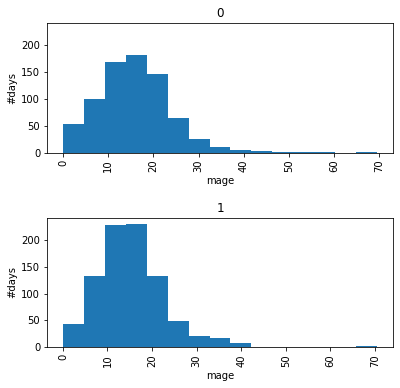

In [61]:
hist = mage_df.hist(column='mage', by = 'alloc', bins=15, sharey=True, layout = (2, 1), figsize=(6,6))

for ax in hist.flatten():
    ax.set_xlabel("mage")
    ax.set_ylabel("#days")


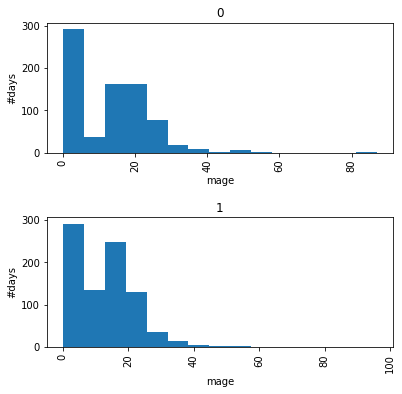

In [64]:
hist = mage_df.hist(column='hmage', by = 'alloc', bins=15, sharey=True, layout = (2, 1), figsize=(6,6))

for ax in hist.flatten():
    ax.set_xlabel("mage")
    ax.set_ylabel("#days")

Text(0, 0.5, 'mage')

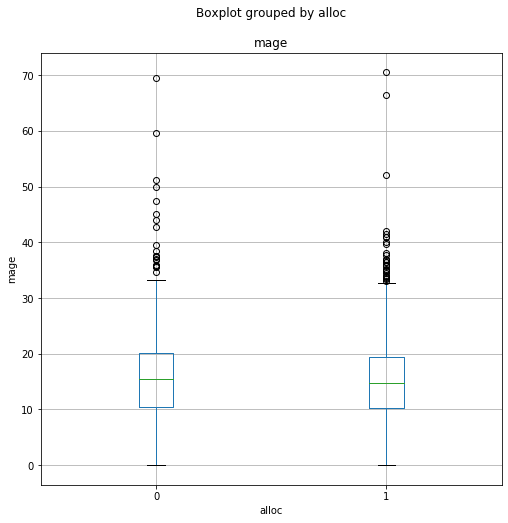

In [85]:
boxplot = mage_df.boxplot(column='mage', by='alloc', figsize=(8,8))
boxplot.set_ylabel('mage')

In [69]:
from scipy import stats

In [83]:
control = np.array(mage_df.loc[mage_df['alloc'] == 0]['mage'])
main = np.array(mage_df.loc[mage_df['alloc'] == 1]['mage'])

In [84]:
stats.ttest_ind(control, main)

Ttest_indResult(statistic=1.166132877018877, pvalue=0.24373132047888377)

## Heatmap on GDM mage for the time before labour date

In [38]:
gdm_df.dropna(subset=['labour date'], inplace=True)

In [39]:
gdm_df['labour date'] = pd.to_datetime(gdm_df['labour date'])

In [57]:
rc_list = ['859116', '64229', '637617', '757248', '670055', '675329', '999443', '292486', '986640', '517738', '521161', '30398', '394858', '485966', '471439', '909576', '405661', '531067', '511664']

In [50]:
gdm_df['RegistrationCode'] = rc_list

In [111]:
len(gdm_df['RegistrationCode'].unique())

19

In [55]:
gdm_dict = gdm_df.set_index('RegistrationCode').to_dict()['labour date']

In [138]:
gdm_dict.keys()

dict_keys(['859116', '64229', '637617', '757248', '670055', '675329', '999443', '292486', '986640', '517738', '521161', '30398', '394858', '485966', '471439', '909576', '405661', '531067', '511664'])

In [69]:
gdm_dict

{'859116': Timestamp('2017-08-29 00:00:00'),
 '64229': Timestamp('2017-10-11 00:00:00'),
 '637617': Timestamp('2017-11-16 00:00:00'),
 '757248': Timestamp('2017-11-16 00:00:00'),
 '670055': Timestamp('2017-12-20 00:00:00'),
 '675329': Timestamp('2017-03-12 00:00:00'),
 '999443': Timestamp('2018-01-13 00:00:00'),
 '292486': Timestamp('2018-04-02 00:00:00'),
 '986640': Timestamp('2018-02-14 00:00:00'),
 '517738': Timestamp('2018-03-29 00:00:00'),
 '521161': Timestamp('2018-03-25 00:00:00'),
 '30398': Timestamp('2018-01-04 00:00:00'),
 '394858': Timestamp('2018-08-06 00:00:00'),
 '485966': Timestamp('2018-08-24 00:00:00'),
 '471439': Timestamp('2018-08-23 00:00:00'),
 '909576': Timestamp('2018-01-09 00:00:00'),
 '405661': Timestamp('2018-12-22 00:00:00'),
 '531067': Timestamp('2019-10-01 00:00:00'),
 '511664': Timestamp('2019-02-14 00:00:00')}

In [62]:
cgm_filtered = cgm_df[cgm_df['RegistrationCode'].isin(gdm_dict.keys())]

In [66]:
cgm_filtered = cgm_filtered.set_index(['RegistrationCode', 'ConnectionID', 'Date'])

In [101]:
len(cgm_filtered.index.get_level_values('RegistrationCode').unique())

19

In [130]:
mage_df_unfiltered = cgmLoader.calculate_mage(cgm_filtered)

In [122]:
mage_df[(mage_df['RegistrationCode'] == '675329') & (mage_df['date'] >= gdm_dict[rc])].index

Int64Index([], dtype='int64')

In [123]:
mage_df

,RegistrationCode,date,mage,hmage,lmage,ge
0,292486,2017-11-08,19.34,23.00,15.67,4.0
47,292486,2017-11-09,32.67,25.67,39.67,6.0
143,292486,2017-11-10,32.25,26.00,38.50,6.0
239,292486,2017-11-11,17.38,15.00,19.75,6.0
334,292486,2017-11-12,15.44,14.00,16.88,9.0
...,...,...,...,...,...,...
5282,999443,2018-07-15,20.00,19.33,20.67,9.0
5378,999443,2018-07-16,30.34,29.67,31.00,11.0
5474,999443,2018-07-17,16.83,14.86,18.80,12.0
5570,999443,2018-07-18,23.23,23.17,23.29,13.0


In [124]:
mage_df.drop(mage_df[(mage_df['RegistrationCode'] == '675329') & (mage_df['date'] >= gdm_dict[rc])].index)

,RegistrationCode,date,mage,hmage,lmage,ge
0,292486,2017-11-08,19.34,23.00,15.67,4.0
47,292486,2017-11-09,32.67,25.67,39.67,6.0
143,292486,2017-11-10,32.25,26.00,38.50,6.0
239,292486,2017-11-11,17.38,15.00,19.75,6.0
334,292486,2017-11-12,15.44,14.00,16.88,9.0
...,...,...,...,...,...,...
5282,999443,2018-07-15,20.00,19.33,20.67,9.0
5378,999443,2018-07-16,30.34,29.67,31.00,11.0
5474,999443,2018-07-17,16.83,14.86,18.80,12.0
5570,999443,2018-07-18,23.23,23.17,23.29,13.0


In [121]:
mage_df[(mage_df['RegistrationCode'] == '675329')]

,RegistrationCode,date,mage,hmage,lmage,ge
0,675329,2017-09-28,28.50,33.00,24.00,2.0
39,675329,2017-09-29,24.00,24.00,24.00,2.0
135,675329,2017-09-30,17.62,18.00,17.25,5.0
226,675329,2017-10-01,12.00,0.00,24.00,1.0
304,675329,2017-10-02,0.00,0.00,0.00,0.0
398,675329,2017-10-03,9.75,0.00,19.50,2.0
481,675329,2017-10-04,9.43,8.67,10.20,8.0
512,675329,2017-10-19,23.75,22.00,25.50,4.0
567,675329,2017-10-20,15.20,14.40,16.00,9.0
626,675329,2017-10-21,14.00,28.00,0.00,1.0


In [131]:
mage_df_unfiltered["RegistrationCode"].unique()

array(['292486', '30398', '394858', '405661', '471439', '485966',
       '511664', '517738', '521161', '531067', '637617', '64229',
       '670055', '675329', '757248', '859116', '909576', '986640',
       '999443'], dtype=object)

In [139]:
for rc in mage_df_unfiltered["RegistrationCode"].unique():
    
    indexNames = mage_df[ (mage_df['RegistrationCode'] == rc) & (mage_df['date'] >= gdm_dict[rc]) ].index
    print(rc, indexNames)

292486 Int64Index([], dtype='int64')
30398 Int64Index([], dtype='int64')
394858 Int64Index([], dtype='int64')
405661 Int64Index([], dtype='int64')
471439 Int64Index([], dtype='int64')
485966 Int64Index([], dtype='int64')
511664 Int64Index([], dtype='int64')
517738 Int64Index([], dtype='int64')
521161 Int64Index([], dtype='int64')
531067 Int64Index([], dtype='int64')
637617 Int64Index([], dtype='int64')
64229 Int64Index([], dtype='int64')
670055 Int64Index([], dtype='int64')
675329 Int64Index([], dtype='int64')
757248 Int64Index([], dtype='int64')
859116 Int64Index([], dtype='int64')
909576 Int64Index([], dtype='int64')
986640 Int64Index([], dtype='int64')
999443 Int64Index([], dtype='int64')


In [128]:
mage_df["RegistrationCode"].unique()

array(['292486', '394858', '405661', '471439', '485966', '511664',
       '517738', '521161', '531067', '637617', '64229', '670055',
       '757248', '859116', '986640', '999443'], dtype=object)

In [132]:
mage_df[mage_df['RegistrationCode'] == '292486']

,RegistrationCode,date,mage,hmage,lmage,ge
47,292486,2017-11-09,32.67,25.67,39.67,6.0
143,292486,2017-11-10,32.25,26.00,38.50,6.0
334,292486,2017-11-12,15.44,14.00,16.88,9.0
524,292486,2017-11-14,22.00,19.50,24.50,8.0
611,292486,2017-11-15,21.91,20.33,23.50,11.0
707,292486,2017-11-16,14.75,0.00,29.50,4.0
787,292486,2017-11-17,20.12,18.67,21.57,10.0
881,292486,2017-11-18,25.20,22.00,28.40,6.0
1068,292486,2017-11-20,16.80,16.00,17.60,6.0
1163,292486,2017-11-21,0.00,0.00,0.00,0.0


In [81]:
mage_df.sort_values(by=['RegistrationCode'])

,RegistrationCode,date,mage,hmage,lmage,ge
47,292486,2017-11-09,32.67,25.67,39.67,6.0
2544,292486,2017-12-17,9.16,0.00,18.33,3.0
2640,292486,2017-12-18,12.96,12.33,13.60,8.0
2729,292486,2017-12-19,8.34,0.00,16.67,3.0
2823,292486,2017-12-20,10.84,0.00,21.67,3.0
...,...,...,...,...,...,...
1635,999443,2017-12-06,18.66,0.00,37.33,3.0
1694,999443,2017-12-07,12.09,11.50,12.67,10.0
1789,999443,2017-12-08,20.75,22.00,19.50,7.0
1972,999443,2017-12-10,20.50,15.00,26.00,3.0


In [96]:
mage_df.index.get_values()

/home/elming/anaconda3/envs/mylabdata/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.



array(['292486', '292486', '292486', '292486', '292486', '292486',
       '292486', '292486', '292486', '292486', '292486', '292486',
       '292486', '292486', '292486', '292486', '292486', '292486',
       '292486', '292486', '292486', '292486', '292486', '292486',
       '292486', '292486', '292486', '292486', '292486', '292486',
       '292486', '292486', '292486', '292486', '292486', '292486',
       '292486', '292486', '292486', '292486', '292486', '292486',
       '292486', '292486', '292486', '292486', '292486', '292486',
       '394858', '394858', '394858', '394858', '394858', '394858',
       '394858', '394858', '394858', '394858', '394858', '394858',
       '394858', '394858', '394858', '394858', '394858', '394858',
       '394858', '394858', '394858', '394858', '394858', '394858',
       '394858', '394858', '394858', '394858', '394858', '394858',
       '394858', '394858', '394858', '394858', '394858', '394858',
       '394858', '394858', '394858', '394858', '394858', '3948

In [146]:
reg_code_list = ['rc'+i for i in gdm_dict.keys()]

In [152]:
len(reg_code_list)

19

In [158]:
mage_df_unfiltered

,date,mage,hmage,lmage,ge,Day_no
RegistrationCode,,,,,,
292486,2017-11-08,19.34,23.00,15.67,4.0,0 days
292486,2017-11-09,32.67,25.67,39.67,6.0,1 days
292486,2017-11-10,32.25,26.00,38.50,6.0,2 days
292486,2017-11-11,17.38,15.00,19.75,6.0,3 days
292486,2017-11-12,15.44,14.00,16.88,9.0,4 days
...,...,...,...,...,...,...
999443,2018-07-15,20.00,19.33,20.67,9.0,249 days
999443,2018-07-16,30.34,29.67,31.00,11.0,250 days
999443,2018-07-17,16.83,14.86,18.80,12.0,251 days


In [148]:
mage_df_unfiltered.set_index('RegistrationCode', inplace=True)

In [150]:
for rc in gdm_dict.keys():
    mage_df_unfiltered.loc[rc,'Day_no'] = mage_df_unfiltered.loc[rc,'date'] - mage_df_unfiltered.loc[rc,'date'][0:1]

In [163]:
mage_df_unfiltered['Day_no']

RegistrationCode
292486     0 days
292486     1 days
292486     2 days
292486     3 days
292486     4 days
           ...   
999443   249 days
999443   250 days
999443   251 days
999443   252 days
999443   253 days
Name: Day_no, Length: 1574, dtype: timedelta64[ns]

In [165]:
day = list(set(mage_df_unfiltered['Day_no'].astype(str))).sort()

In [160]:
list_of_cvs = []

for rc in gdm_dict.keys():
    list_of_cvs.append(list(mage_df_unfiltered.loc[(rc), 'mage']))

In [166]:
mage_df_unfiltered

,date,mage,hmage,lmage,ge,Day_no
RegistrationCode,,,,,,
292486,2017-11-08,19.34,23.00,15.67,4.0,0 days
292486,2017-11-09,32.67,25.67,39.67,6.0,1 days
292486,2017-11-10,32.25,26.00,38.50,6.0,2 days
292486,2017-11-11,17.38,15.00,19.75,6.0,3 days
292486,2017-11-12,15.44,14.00,16.88,9.0,4 days
...,...,...,...,...,...,...
999443,2018-07-15,20.00,19.33,20.67,9.0,249 days
999443,2018-07-16,30.34,29.67,31.00,11.0,250 days
999443,2018-07-17,16.83,14.86,18.80,12.0,251 days


In [161]:
import plotly.graph_objects as go

In [167]:
fig = go.Figure(data=go.Heatmap(
                    z=list_of_cvs,
                    x=day,
                    y=reg_code_list,
                    ))
fig.show()